In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

# get data from fits file
data_g = Table.read("gaia_data_with_straight_cutoff.fits")
data_rv = Table.read("gaia_rv_with_straight_cutoff.fits")

# get distance
distance_g = 1/data_g["parallax"] # in kpc
distance_rv = 1/data_rv["parallax"] # in kpc

# get rid of stars with negative distance
mask_g = distance_g>0
data_g = data_g[mask_g]
mask_rv = distance_rv>0
data_rv = data_rv[mask_rv]

# get coordinates and magnitude of both gaia and rv
ra_g = data_g['ra'] #degree
dec_g = data_g['dec'] #degree
distance_g = 1/data_g["parallax"] # in kpc
gmag_g = data_g["phot_g_mean_mag"] # magnitude
color_g = data_g["bp_rp"] # magnitude
ra_rv = data_rv['ra'] #degree
dec_rv = data_rv['dec'] #degree
distance_rv = 1/data_rv["parallax"] # in kpc
gmag_rv = data_rv["phot_g_mean_mag"] # magnitude
color_rv = data_rv["bp_rp"] # magnitude

#set variables for histogram
ra_pixel = 1 # degree
dec_pixel = 1 # degree
ra_min = min(np.min(ra_g), np.min(ra_rv))
dec_min = min(np.min(dec_g), np.min(dec_rv))
ra_max = max(np.max(ra_g), np.max(ra_rv))
dec_max = max(np.max(dec_g), np.max(dec_rv))
bin_ra = (ra_max - ra_min)/ra_pixel
bin_dec = (dec_max - dec_min)/dec_pixel

c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'Ratio of Number in RV/Gaia')

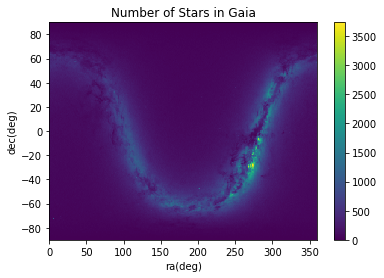

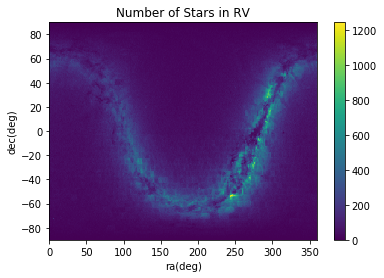

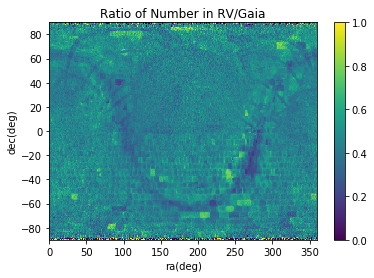

In [2]:
# get 2d histogram for gaia
plt.figure(1)
histogram_g, xedges, yedges, graph = plt.hist2d(ra_g, dec_g, 
                                                bins = (bin_ra, bin_dec),
                                                range = [[ra_min, ra_max],
                                                         [dec_min, dec_max]])
plt.colorbar()
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Number of Stars in Gaia")

# get 2d histogram for rv
plt.figure(2)
histogram_rv, xedges, yedges, graph = plt.hist2d(ra_rv, dec_rv, 
                                                bins = (bin_ra, bin_dec),
                                                range = [[ra_min, ra_max],
                                                         [dec_min, dec_max]])
plt.colorbar()
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Number of Stars in RV")

# define number of stars as a function of ra and dec
def number(ra, dec, histogram):
    ra_index = ((ra-ra_min)/ra_pixel).astype(int)-1
    dec_index = ((dec-dec_min)/dec_pixel).astype(int)-1
    if np.ndim(ra) == 1:
        result = []
        for i in range(np.size(ra_index)):
            result.append(histogram[ra_index[i]][dec_index[i]])
        return np.array(result)
    elif np.ndim(ra) == 2:
        result = []
        for i in range(np.shape(ra_index)[0]):
            row = []
            for j in range(np.shape(ra_index)[1]):
                row.append(histogram[ra_index[i][j]][dec_index[i][j]])
            result.append(row)
        return np.array(result)

# define the ratio of number density as a function of ra and dec
def ratio(ra, dec):
    return number(ra, dec, histogram_rv)/number(ra, dec, histogram_g)

# compute an array of ratio and plot
ra_linspace = np.linspace(ra_min, ra_max, bin_ra)
dec_linspace = np.linspace(dec_min, dec_max, bin_dec)
ra_v, dec_v = np.meshgrid(ra_linspace, dec_linspace)
z = ratio(ra_v, dec_v)
# change nan to zero
z = np.nan_to_num(z)
plt.figure(3)
#plt.pcolor(ra_v, dec_v, z, norm = LogNorm())
plt.pcolor(ra_v, dec_v, z)
plt.colorbar()
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title("Ratio of Number in RV/Gaia")

Local magnitude distribution

(ra,dec) to check = 200,40


c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


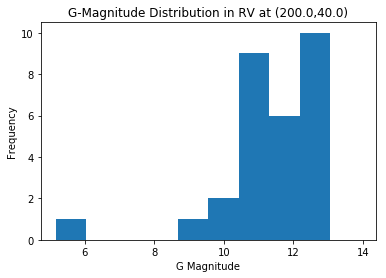

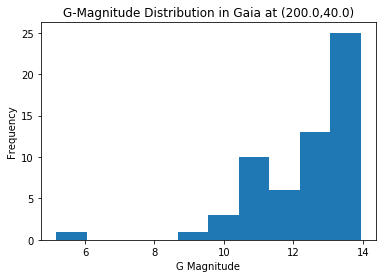

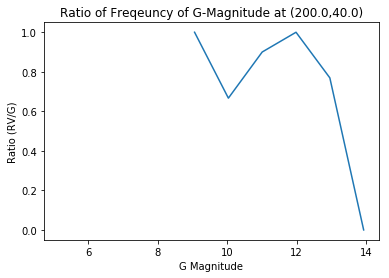

In [5]:
ra_0, dec_0 = input("(ra,dec) to check = ").split(',')
ra_0 = float(ra_0)
dec_0 =  float(dec_0)
# search for relevant stars in rv
mask_search_rv = np.all(np.array([ra_rv > ra_0, ra_rv < ra_0 + ra_pixel, dec_rv > dec_0,
                        dec_rv < dec_0 + dec_pixel]), axis = 0)
search_rv = data_rv[mask_search_rv]
# get magnitude of search star
gmag_rv = search_rv["phot_g_mean_mag"]

# search for relevant stars in gaia
mask_search_g = np.all(np.array([ra_g > ra_0, ra_g < ra_0 + ra_pixel, dec_g > dec_0,
                        dec_g < dec_0 + dec_pixel]), axis = 0)
search_g = data_g[mask_search_g]
# get magnitude of search star
gmag_g = search_g["phot_g_mean_mag"]

mag_min = min(np.min(gmag_g), np.min(gmag_rv))
mag_max = max(np.max(gmag_g), np.max(gmag_rv))

plt.figure()
hist_gmag_rv, edges_rv, patches_rv = plt.hist(gmag_rv, range = (mag_min, mag_max), bins = 10)
plt.xlabel('G Magnitude')
plt.ylabel('Frequency')
plt.title("G-Magnitude Distribution in RV at ({},{})".format(ra_0, dec_0))
plt.savefig("G-Magnitude Distribution in RV at ({},{}).png".format(ra_0, dec_0))

plt.figure()
hist_gmag_g, edges_g, patches_g = plt.hist(gmag_g, range = (mag_min, mag_max), bins = 10)
plt.xlabel('G Magnitude')
plt.ylabel('Frequency')
plt.title("G-Magnitude Distribution in Gaia at ({},{})".format(ra_0, dec_0))
plt.savefig("G-Magnitude Distribution in Gaia at ({},{}).png".format(ra_0, dec_0))
              
plt.figure()
plt.plot(np.linspace(mag_min, mag_max, 10), hist_gmag_rv/hist_gmag_g)
plt.xlabel('G Magnitude')
plt.ylabel('Ratio (RV/G)')
plt.title("Ratio of Freqeuncy of G-Magnitude at ({},{})".format(ra_0, dec_0))
plt.savefig("Ratio of Freqeuncy of G-Magnitude at ({},{}).png".format(ra_0, dec_0))

Global magnitude distribution

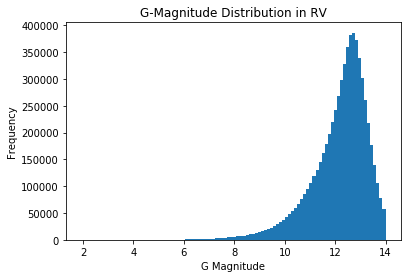

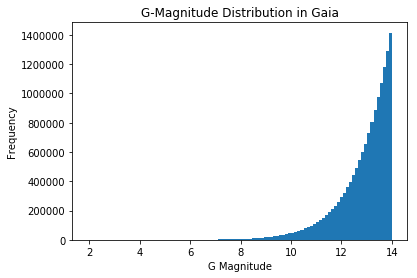

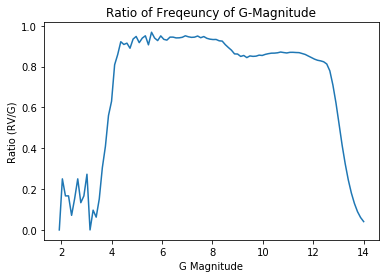

In [8]:
gmag_g = data_g["phot_g_mean_mag"] # magnitude
gmag_rv = data_rv["phot_g_mean_mag"] # magnitude

mag_min = min(np.min(gmag_g), np.min(gmag_rv))
mag_max = max(np.max(gmag_g), np.max(gmag_rv))

plt.figure()
hist_gmag_rv, edges_rv, patches_rv = plt.hist(gmag_rv, range = (mag_min, mag_max), bins = 100)
plt.xlabel('G Magnitude')
plt.ylabel('Frequency')
plt.title("G-Magnitude Distribution in RV")
plt.savefig("G-Magnitude Distribution in RV.png")

plt.figure()
hist_gmag_g, edges_g, patches_g = plt.hist(gmag_g, range = (mag_min, mag_max), bins = 100)
plt.xlabel('G Magnitude')
plt.ylabel('Frequency')
plt.title("G-Magnitude Distribution in Gaia")
plt.savefig("G-Magnitude Distribution in Gaia.png")
              
plt.figure()
plt.plot(np.linspace(mag_min, mag_max, 100), hist_gmag_rv/hist_gmag_g)
plt.xlabel('G Magnitude')
plt.ylabel('Ratio (RV/G)')
plt.title("Ratio of Freqeuncy of G-Magnitude")
plt.savefig("Ratio of Freqeuncy of G-Magnitude.png")

Global parallax distribution

In [ ]:
gmag_g = data_g["phot_g_mean_mag"] # magnitude
gmag_rv = data_rv["phot_g_mean_mag"] # magnitude

mag_min = min(np.min(gmag_g), np.min(gmag_rv))
mag_max = max(np.max(gmag_g), np.max(gmag_rv))

plt.figure()
hist_gmag_rv, edges_rv, patches_rv = plt.hist(gmag_rv, range = (mag_min, mag_max), bins = 10)
plt.xlabel('G Magnitude')
plt.ylabel('Frequency')
plt.title("G-Magnitude Distribution in RV")
plt.savefig("G-Magnitude Distribution in RV.png")

plt.figure()
hist_gmag_g, edges_g, patches_g = plt.hist(gmag_g, range = (mag_min, mag_max), bins = 10)
plt.xlabel('G Magnitude')
plt.ylabel('Frequency')
plt.title("G-Magnitude Distribution in Gaia")
plt.savefig("G-Magnitude Distribution in Gaia.png")
              
plt.figure()
plt.plot(np.linspace(mag_min, mag_max, 10), hist_gmag_rv/hist_gmag_g)
plt.xlabel('G Magnitude')
plt.ylabel('Ratio (RV/G)')
plt.title("Ratio of Freqeuncy of G-Magnitude")
plt.savefig("Ratio of Freqeuncy of G-Magnitude.png")